## Econometric Measures of Connectedness and Risk in Financial Markets
### The model 
- Let $1 + R_t = \frac{P_t}{P_{t-1}}$ be the percentage return for asset i between times t-1 and t.   We define log return as $r_t = log(1 + R_t)$
- Volatility $\sigma_t^2 = Var(r_t^2 | F_{t-1}) = E[(r_t -  \mu_t)^2 | F_{t-1}]$
- Assumes Garch(1,1) model for volatility of asset returns.  
- More specifically, for log returns $r_t$, let $a_t = r_t - \mu_t$ be innovation at time t.  Then $a_t$ ~ Garch(1,1) if:
    
$a_t = \sigma_t \epsilon_t$  

$\sigma_t^2 = \omega_0 + \gamma_1 a_{t-1} + \beta_1 \sigma_{t-1}^2$

where $\epsilon_t$ is the error process, $\epsilon_t$ ~ iid $N(0,1)$ and $(\gamma_1 + \beta_1) < 1$  
### Note
- The constraint is needed to ensure the variance process is finite

### QuasiMaximum Likelihood Estimation
- In order to estimate the parameters of the model, we are going to be maximizing the loglikelihood of the innovation series.  
- Let $\theta = (\omega_0, \gamma_1, \beta_1)$ be the parameter we are trying to estimate
- Let $L(\theta | a_t, a_{t-1}, ..., a_0) = f(a_t, a_{t-1}, ..., a_0 | \theta)$ be the likelihood function which is the joint density of interest 
- To derive the joint density, we use the law of total probability;
  - $f(a_t, a_{t-1}, ..., a_0 | \theta) = f(a_t | F_{t-1})f(a_{t-1} | F_{t-2}) ...f(a_1 | F_0)f(a_o | \theta) = f(a_o | \theta)\prod_{k=1}^t f(a_k | F_{k-1})$

    So...

    $L(\theta | a_t, a_{t-1}, ..., a_0) = f(a_o | \theta)\prod_{k=1}^t f(a_k | F_{k-1})$

- __Note__: We are taking the maximum likelihood of past innovation in the series to the present time t

- Taking the log of the likelihood, we obtain the following equation: 
  - $log(L(\theta | a_t, a_{t-1}, ..., a_0)) = \log{f(a_o | \theta)} + \sum_{k=1}^T \log{f(a_k | F_{k-1})}$

- In a large sample size, contribution from $\log{f(a_o | \theta)}$ is small and hence dropped
- Since $\epsilon_t$ ~ $N(0,1)$, then $a_t$ ~ $N(0, \sigma_t^2)= \frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{a_t^2}{2\sigma^2_t}}$
  
  So 

  $\log{L(\theta | a_t, a_{t-1}, ..., a_0)} = \sum_{k=1}^t-\frac{1}{2}\log{2\pi\sigma_k^2} - \frac{a_k^2}{2\sigma^2_k}$

- Factoring out the above equation, we get...

  - $\log{L(\theta | a_t, a_{t-1}, ..., a_0)} = -(\frac{t}{2}\log{2\pi} + \sum_{k=1}^{t} \frac{1}{2}\log{\sigma_k^2} + \frac{a_k^2}{2\sigma^2_k})$


- Above is same as minimizing -$\log{L(\theta | a_t, a_{t-1}, ..., a_0)}:=QL(\theta)$
- Since the constant has no affect, we drop it, and get the desired Quasi MLE: 

$QL(\theta) = \frac{1}{2}\sum_{k=1}^{t}\log{\sigma_k^2(\theta)} + \frac{a_k^2}{\sigma^2_k(\theta)}$

### Principal Component Analysis
- Authors use pca on a system of returns.  More specificially, let $\sum_{R} = QDQ^T$ represent the spectral decomposition of 
covariance matrix of $R_t$ where each column is given by $R_i(t) = \frac{R_i(t) - \mu_i(t)}{\sigma_i(t)}$
- D is the eigen values of $\sum_R$ and $Q$ is orthogonol eigen vectors
- Matrix of principal components of $\sum_R$ is then a Txp matrix P given by: $P = RQ$
- Since $Q = col(q_k)_{k=1:n}$ then $RQ = col(Rq_k)_{k=1:n} = (Rq_1 | Rq_2 | ... | Rq_n)$ 
  - Hence $Rq_k = \sum_{i=1}^n R_i q_k(i) = p_k$ the kth column of matrix P 
  - Hence kth principal component of $\sum_R$ is defined as kth column of P and given by $p_k = R_1q_k(1) + R_2q_k(2) + ... + R_nq_k(n)$
### Covariance of Principal Component 
- $\sum_p = T^{-1}PP^T = T^{-1}(RQ)^T(RQ) = T^{-1}(Q^TR^TRQ) = Q^T \sum_R Q = Q^T (QDQ^T)Q = D$; A diagonal whose entries are eigen values of $\sum_R$
- Variance of kth principal component is given by $\lambda_k$
- Total variation in R is sum of eigen values of $\sum_R$ which is $trace(\sum_R)$ 
- Proportion of variation explained by kth principal component $\frac{\lambda_k}{tr(\sum_R)}$

### Granger Causality
- To model the directionality of shocks in a system, the authors use a concept called 'Granger Causality' 
- Time series j is said to 'Granger-Cause' time series i if past values of j contain information helps predict i above and beyond the information contained in past values of i alone. 
- Let $R_t^i$ and $R_t^j$ be two (Tx1) time series with 0 mean.  Their linear relationship is represented with the following model: 

$R_t^i = \gamma_0 + \gamma_1R_{t-1}^i + \gamma_2 R_{t-1}^j + \epsilon_t^i$

$R_t^j = \beta_0 + \beta_1R_{t-1}^i + \beta_2 R_{t-1}^j + \epsilon_t^j$

for an observation at time t.  

Collecting the terms in a matrix, we see: 

$Z_t = \theta_0 + \theta_1 Z_{t-1} + \epsilon_t$

where $Z_t = \begin{pmatrix} R_t^i \\ R_t^j\end{pmatrix}$ is a (2T x 1) vector, $\theta_0 = \begin{pmatrix}\gamma_0 \\ \beta_0\end{pmatrix}$ is a (2T x 1) vector, $\theta_1 = \begin{pmatrix} \gamma_1 & \gamma_2 \\
\beta_1 & \beta_2 \end{pmatrix}$ is a (2T x 2T) matrix 

## Non-linear Granger Causality
- Computing GC via regressions has its limitations as we are checking for linear granger causality.  
- Authors propose a Non linear Granger Causality Model that uses Markov Switching Regression 

### MSR 
- Markov Switching Regression (MSR) is given by the following equation for $t=1,\ldots, T:$

$y_t = x_t^{'}  \beta_{S_t} + e_t$, $e_t$ ~ $N(0, \sigma_{S_t}^2)$

$\beta_{S_t} = \beta_0 (1 - S_t) + \beta_1 S_t$

$\sigma_{S_t}^2 = \sigma_0^{2} (1-S_t) + \sigma_1^{2} S_t$

- where $S_t = 0$ or $1$ represents two different possible regimes at time t

### Quasi-Maximum Likelihood estimation
- Following similar procedure as the Garch model, we will maximize the loglikelihood of the residual series.  Since the residuals are iid, by assumption, the log likelihood is given by:

$L_T(\theta) = \frac{1}{T} \sum_{t=1}^T \log f(y_t | F_{t-1};\theta)$
  
where $f(y_t | F_{t-1};\theta) = \frac{1}{\sqrt{2\pi\sigma_{S_t}^2}}e^{-\frac{(y_t - x_t^{'}\beta_{S_t})^2}{2\sigma^2_{S_t}}}$

## Problem
- $S_t$, $t=1,\ldots T$ is not observable.  So MLE is not applicable
- So use joint density instead: 

$f(y_t | F_{t-1};\theta) = \sum_{i=0}^1 f(y_t,S_t=i | F_{t-1};\theta) = \sum_{i=0}^1 f(y_t | S_t=i,F_{t-1};\theta) f(S_t | F_{t-1};\theta)$

Hence...

$L_T(\theta) = \frac{1}{T} \sum_{t=1}^T \log f(y_t | F_{t-1};\theta)$

where 

$f(y_t | F_{t-1};\theta) = \sum_{i=0}^1 f(y_t | S_t=i,F_{t-1};\theta) f(S_t | F_{t-1};\theta)$

- In order to access likelihood of state variable $S_t = i, i=0,1$, we need to evaluate its optimal forecast based on different information sets
- These forecasts include:
  - the __filtering probabilities__ given by $P(S_t = i | F_t; \theta)$ which is based on "current and past" information
  - __prediction probabilities__ given by $P(S_t = i | F_{t-1};\theta)$ which is based on information prior to time t 
  - __smoothing probabilities__ given by $P(S_t = i | F_T; \theta)$ which is based on full sample information 


### Filtering probabilities
In the filtering step, once $y_t$ is observed, probability terms are updatd as follows:
$ P(S_t = j | F_t) = P(S_t = j | y_t, F_{t-1}) = \frac{f(y_t, S_t = j | F_{t-1})}{f(y_t | F_{t-1})} = \frac{f(y_t | S_t = j, F_{t-1}) P(S_t = j | F_{t-1})}{\sum_{i=0}^1 f(y_t | S_t = i, F_{t-1}) P(S_t = i | F_{t-1})}$

- Lets collect the filtering probabilities into 2x1 vector $\pi_{t|t} = \begin{pmatrix} P(S_t = 0 | F_t ; \theta) \\ P(S_t = 1 | F_t ;\theta) \end{pmatrix}$
- Likewise, collecting the densities into a 2x1 vector $\eta_{t} = \begin{pmatrix} f(y_t, S_t = 0 | F_{t-1})\\ f(y_t, S_t = 1 | F_{t-1})\end{pmatrix}$
- Hence we see the filtering step can be rewritten as: 

$\pi_{t|t} = \frac{\pi_{t|t-1} \otimes \eta_t}{1^{'}(\pi_{t|t-1} \otimes \eta_t)}$

### Prediction probabilities
$P(S_t = j | F_{t-1};\theta) = \sum_{i=0}^{1} P(S_t = j, S_{t-1} = i | F_{t-1}) = \sum_{i=0}^{1} p_{ij} \pi_{i,{t-1 | t-1}} = \pi_{t-1 | t-1}^{'} P_j$

- $p_{ij} = P(S_t = j | S_{t-1} = i, F_{t-1} ; \theta)$ is the transition probabilities from state i at time t-1 to state j at time t.  
- $P_j$ is the jth column of transition matrix P

- $\pi_i(t-1)$ is the distribution given by: $P(S_{t-1} = i | F_{t-1})$

- $\pi_t = (\pi_0(t), \pi_1(t))^{'}$ is a 2x1 vector of probability distribution of state variables
- Collecting the probabilities above into a 2x1 vector, we see above can be rewritten as: 

$\pi_{t|t-1} = P \pi_{t-1 | t-1}$

### Smoothing probabilities
- To compute smoothing probabilities $P(St=i | F_T ; \theta)$ via kim's algorithm, note:
$P(S_t = i | S_{t+1} = j, F_T ; \theta) = P(S_t = i | S_{t+1} = j, F_t ; \theta) = \frac{P(S_t = i | F_t ; \theta) p_{ij}}{P(S_{t+1} = j | F_t ; \theta)}$

Now, conditioning on next timestep, we see...

$P(S_t = i | F_T ; \theta) = \sum_{j=0}^{1} P(S_t = i | S_{t+1} = j, F_T ; \theta) P(S_{t+1} = j | F_T ; \theta)$

Substituting the smoothing probabilities above, we get the desired equation:

$P(S_t = i | F_T ; \theta) = P(S_t = i | F_t ; \theta) \sum_{j=0}^{1} \frac{p_{ij} P(S_{t+1} = j | F_T ; \theta)}{P(S_{t+1} = j | F_t ; \theta)}$
- Collecting above in a matrix, we can see it can be rewritten as: 

$ \pi_{t|T} = \pi_{t|t} \otimes (P^{'} (\pi_{t+1 | T} \div \pi_{t+1 | t}))$
- So, given filtering probabilities computed in last step, $P(S_T = i | F_T ; \theta)$, we then compute $P(S_{T-1} = i | F_T ; \theta)$
- Iterate through the above steps, the smoothed probabilities can be computed for $T-1, T-2,\ldots 1$ given estimated parameters

### MSR-QMLE Algorithm
- __Step 1 - Initiate starting values__
  - Compute the transition matrix given by: $p_{00} = (1+e^{p_o})^{-1}$ and $p_{11} = (1+e^{q_o})^{-1}$
  - Linear solve for $\pi_{0|0}:  \begin{pmatrix} I_2 - P \\ 1_2^{'} \end{pmatrix} \pi_{0|0} = \begin{pmatrix} 0_{2x1} \\ 1 \end{pmatrix}$ Hence, letting $A = \begin{pmatrix} I_2 - P \\ 1_2^{'} \end{pmatrix}$, wee see $A \pi_{0|0} = \begin{pmatrix} 0_{2x1} \\ 1 \end{pmatrix}$   where $1_2$ is 2x1 vector of ones.  This happens to be the third column of $(A'A)^{-1}A'$
  - compute the predicted probabilities $\pi_{1|0} = P \pi_{0|0}$
  - Compute the densities $\eta_1 = \begin{pmatrix} f(y_1, S_1 = 0 | F_{0})\\ f(y_1, S_1 = 1 | F_{0})\end{pmatrix}$
- __Step 2__
  - Start the filter $\pi_{t|t} = \frac{\pi_{t|t-1} \otimes \eta_t}{1^{'}(\pi_{t|t-1} \otimes \eta_t)}$ for $t = 1,\ldots,T$
  - Compute the predicted probabilities $\pi_{t|t-1} = P \pi_{t-1 | t-1}$  for $t = 2,\ldots,T$
 - __Step 3__
   - Construct the loglikelihood function $L_T(\theta) = \frac{1}{T} \sum_{t=1}^T \log f(y_t | F_{t-1};\theta)$
 - __Step 4__
   - Use BFGS to minimize the loglikelihood function and obtain the parameters


  ### Issues
  - the log-likelihood is a sum of complicated density functions.  So the optimizer

In [1]:
# simulating a bivariate VAR process
from vector_ar.bivar import BiVariateVar

In [14]:
from vector_ar.bivar import BiVariateVar
bivar = BiVariateVar()
x, y = bivar._simulate_var()
bivar.fit(x, y, p=1)

In [10]:
bivar.theta
print("correlation matrix")
np.corrcoef((bivar.residuals[:,0], bivar.residuals[:, 1]))

array([[3.00220432, 0.39220357, 0.30608992],
       [4.83016781, 0.21222938, 0.09957936]])

correlation matrix


array([[1.        , 0.80759851],
       [0.80759851, 1.        ]])

In [6]:
from statsmodels.tsa.api import VAR
data = pd.DataFrame(np.concatenate((x[:, np.newaxis], y[:, np.newaxis]), axis=1))
v = VAR(data)
result = v.fit(1, trend='c')

In [7]:
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 14, Aug, 2020
Time:                     23:40:06
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  -0.970110
Nobs:                     999.000    HQIC:                 -0.988379
Log likelihood:          -2329.75    FPE:                   0.368034
AIC:                    -0.999580    Det(Omega_mle):        0.365833
--------------------------------------------------------------------
Results for equation 0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         3.109944         0.231703           13.422           0.000
L1.0          0.387471         0.041874            9.253           0.000
L1.1          0.297355         0.051129            5.816           0.000

Results for equation 1

In [36]:
np.corrcoef((var.residuals[:,0], var.residuals[:, 1]))

array([[1.        , 0.79996231],
       [0.79996231, 1.        ]])

In [11]:
chk = v.select_order(trend='c')

In [12]:
chk.summary()

,AIC,BIC,FPE,HQIC
0,-0.4281,-0.4182,0.6517,-0.4243
1,-0.9935*,-0.9636*,0.3703*,-0.9821*
2,-0.9904,-0.9405,0.3714,-0.9715
3,-0.9841,-0.9142,0.3738,-0.9575
4,-0.9792,-0.8894,0.3756,-0.9450
5,-0.9752,-0.8654,0.3771,-0.9334
6,-0.9693,-0.8395,0.3794,-0.9199
7,-0.9679,-0.8182,0.3799,-0.9110
8,-0.9614,-0.7917,0.3824,-0.8968
9,-0.9543,-0.7646,0.3851,-0.8821


In [13]:
d = bivar.auto_select(x, y)

In [17]:
d # high agreement

{'min_bic': (1, -0.971484646091933),
 'bic_results': {(0, -0.3718468862128184),
  (1, -0.971484646091933),
  (2, -0.9482981853109385),
  (3, -0.922363405860413),
  (4, -0.8978131227858318),
  (5, -0.8728075628730364)}}

### checking garch model

In [38]:

from arch import arch_model
omega = 0.2
gamma = 0.4
beta = 0.3
w = np.random.standard_normal(10000)
a = np.zeros_like(w)
var = np.zeros_like(w)

for t in range(1, 10000):
    var[t] = omega + gamma * a[t-1]**2 + beta * var[t-1]
    a[t] = w[t] * np.sqrt(var[t])

In [5]:
g = Garch(mean=False)
g.fit(a)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 11205.911934699334
            Iterations: 16
            Function evaluations: 43
            Gradient evaluations: 15


In [6]:
g.theta

array([0.21321654, 0.41325311, 0.26839953])

In [7]:
from arch import arch_model
am = arch_model(a,mean='Zero')
res = am.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 11365.816120170408
Iteration:      2,   Func. Count:     11,   Neg. LLF: 11265.779976600112
Iteration:      3,   Func. Count:     17,   Neg. LLF: 11258.724147550663
Iteration:      4,   Func. Count:     23,   Neg. LLF: 11225.996219486096
Iteration:      5,   Func. Count:     29,   Neg. LLF: 11211.280043719104
Iteration:      6,   Func. Count:     35,   Neg. LLF: 11209.00213577437
Iteration:      7,   Func. Count:     40,   Neg. LLF: 11207.06556886276
Iteration:      8,   Func. Count:     45,   Neg. LLF: 11205.640593871849
Iteration:      9,   Func. Count:     50,   Neg. LLF: 11205.623989636702
Iteration:     10,   Func. Count:     55,   Neg. LLF: 11205.623898489112
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 11205.62389784831
            Iterations: 10
            Function evaluations: 56
            Gradient evaluations: 10


In [8]:
res.params

omega       0.213198
alpha[1]    0.415659
beta[1]     0.267057
Name: params, dtype: float64

In [1]:
from marketlearn.network_causality.causality_network import CNet
cnet = CNet("1999-12-31")
bdealer = cnet.sectors['bdealer'].iloc[:, :-1]

current directory is: /Users/raj/Documents/QuantResearch/Home/market-learn/marketlearn/network_causality


In [2]:
cnet.risk_fraction(bdealer, n=5)

0.5836838597324325

In [3]:
cnet.pcas(bdealer, 'LEN US Equity')

0.6849692774665898

In [4]:
g = cnet._create_casual_network(bdealer)

In [5]:
cnet.granger_causality_degree(bdealer, graph=g)

0.5686274509803921

In [6]:
cnet.number_of_connections(bdealer, 'SCHW US Equity', conn_type='out', graph=g)

0.4117647058823529

In [7]:
cnet.number_of_connections(bdealer, 'SCHW US Equity', conn_type='in', graph=g)

0.6470588235294118

In [8]:
cnet.number_of_connections(bdealer, 'SCHW US Equity', conn_type='total', graph=g)

0.5294117647058824

In [14]:
pd.DataFrame(g.get_adjacency_matrix().toarray())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
5,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
7,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
8,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
9,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [75]:
# Log prices pt = log(Pt)
logp1 = np.log(price1).values
logp2 = np.log(price2).values

# Log returns rt = pt - pt-1
ret = np.diff(logp1)
ret2 = np.diff(logp2)

# Remove mean from sample prior to garch fit
returns = [None, None]

from scipy.stats import ttest_1samp
_, pval = ttest_1samp(ret, 0)
# Sample mean is not zero
if pval < 0.05:
     ret -= ret.mean()
_, pval = ttest_1samp(ret2, 0)
if pval < 0.05:
    ret2 -= ret2.mean()

In [76]:
from learning.network_causality.garch.garch import Garch

In [77]:
gr = Garch(mean=False)
gr.fit(ret2)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -214.09645529437836
            Iterations: 36
            Function evaluations: 153
            Gradient evaluations: 32


In [78]:
gr.theta

array([0.00074016, 0.07031357, 0.8352882 ])

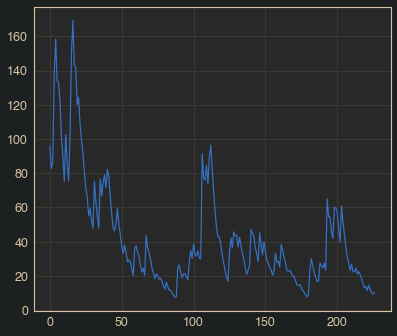

In [79]:
plt.plot(gr._simulate_vol(100*ret2))

In [71]:
from arch import arch_model
am = arch_model(ret2, mean='Zero')
res = am.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: -216.04662117445963
Iteration:      2,   Func. Count:     12,   Neg. LLF: -216.2220220705144
Iteration:      3,   Func. Count:     18,   Neg. LLF: -216.48280692122543
Iteration:      4,   Func. Count:     24,   Neg. LLF: -216.69838477903136
Iteration:      5,   Func. Count:     30,   Neg. LLF: -216.89516312759292
Iteration:      6,   Func. Count:     36,   Neg. LLF: -217.0667798250234
Iteration:      7,   Func. Count:     42,   Neg. LLF: -217.20025749435882
Iteration:      8,   Func. Count:     48,   Neg. LLF: -217.30662060541462
Iteration:      9,   Func. Count:     54,   Neg. LLF: -217.3774007542554
Iteration:     10,   Func. Count:     60,   Neg. LLF: -217.4294941580678
Iteration:     11,   Func. Count:     66,   Neg. LLF: -217.44738058569482
Iteration:     12,   Func. Count:     72,   Neg. LLF: -217.45998954491571
Iteration:     13,   Func. Count:     77,   Neg. LLF: -217.47773762794998
Iteration:     14,   Func. Count:     82, 

In [72]:
res.params
print("my garch gives")
gr.theta

omega       0.000361
alpha[1]    0.042261
beta[1]     0.907263
Name: params, dtype: float64

my garch gives


array([0.00074016, 0.07031357, 0.8352882 ])

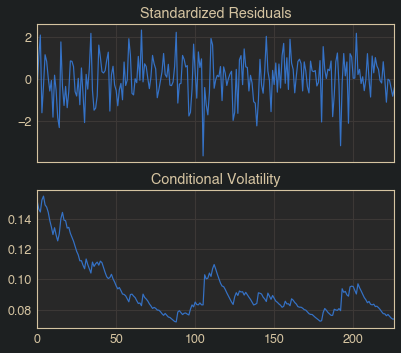

In [73]:
res.plot();

In [76]:
g = Garch(mean=False)
g.fit(a)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 11164.951757154242
            Iterations: 18
            Function evaluations: 40
            Gradient evaluations: 18


In [77]:
g.theta.round(2)

array([0.21, 0.39, 0.29])

In [78]:
am = arch_model(a, mean='Zero')
res = am.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 11270.444481495619
Iteration:      2,   Func. Count:     11,   Neg. LLF: 11196.324000760922
Iteration:      3,   Func. Count:     18,   Neg. LLF: 11193.841008125819
Iteration:      4,   Func. Count:     24,   Neg. LLF: 11175.335220071902
Iteration:      5,   Func. Count:     30,   Neg. LLF: 11164.794243871389
Iteration:      6,   Func. Count:     37,   Neg. LLF: 11164.778299541269
Iteration:      7,   Func. Count:     42,   Neg. LLF: 11164.602455871842
Iteration:      8,   Func. Count:     47,   Neg. LLF: 11164.577943486
Iteration:      9,   Func. Count:     52,   Neg. LLF: 11164.577889946586
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 11164.577889106498
            Iterations: 9
            Function evaluations: 53
            Gradient evaluations: 9


In [79]:
res.params

omega       0.206297
alpha[1]    0.389989
beta[1]     0.294678
Name: params, dtype: float64

In [2]:
from marketlearn.learning.msr.markov_switching import MarkovSwitchingRegression

In [3]:
msr = MarkovSwitchingRegression()


In [6]:
p0 = 0.2
q0 = 0.4
pii, pjj = map(lambda x: msr._sigmoid(x), [p0, q0])

In [7]:
transition_matrix = msr._transition_matrix(pii, pjj)

In [8]:
transition_matrix

array([[0.549834  , 0.450166  ],
       [0.40131234, 0.59868766]])

In [8]:
bdealer

NameError: name 'bdealer' is not defined